# 04 — Scaling (Escalamiento) en 2D

## Escalamiento en 2D (definición)
La transformación de **scaling** (escalamiento) se define como:
$x_2 = a\,x_1, \qquad y_2 = b\,y_1$

En forma matricial:

\begin{bmatrix}
x_2 \\
y_2
\end{bmatrix}
=
\begin{bmatrix}
a & 0 \\
0 & b
\end{bmatrix}

\begin{bmatrix}
x_1 \\
y_1
\end{bmatrix}


donde:
- \(a\) es el factor de escala en el eje \(x\).
- \(b\) es el factor de escala en el eje \(y\).

> **Notas**  
> - Si \(a=b>1\): amplía la imagen.  
> - Si \(a=b<1\): reduce la imagen.  
> - Si $(a\neq b)$: cambia la **relación de aspecto**.


## Implementación en OpenCV

A continuación aplicamos escalamiento a la imagen `lenna.png` usando:
1. `cv2.resize` con factores `fx` y `fy` (forma directa).  
2. `cv2.warpAffine` con una matriz 2×3 que incorpora el escalamiento alrededor del **centro** de la imagen.


✅ Imagen cargada: (512, 512, 3) uint8


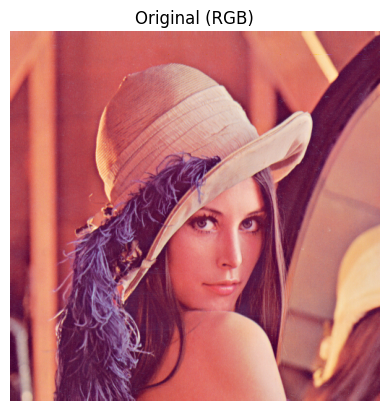

In [ ]:
# ✅ Importar librerías y cargar imagen
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar con el MISMO estilo de ruta que usas en tus notebooks
img_bgr = cv2.imread(r"C:\Users\rrm21\Documents\Vision_en_Robotica\imagenes\lenna.png")  # Cambia la ruta si es necesario

if img_bgr is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")
print("✅ Imagen cargada:", img_bgr.shape, img_bgr.dtype)

# Convertir a RGB para mostrar correctamente en Matplotlib
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mostrar original (una figura, sin especificar colores)
plt.imshow(img_rgb)
plt.title("Original (RGB)")
plt.axis("off")
plt.show()


### A) Escalamiento directo con `cv2.resize`

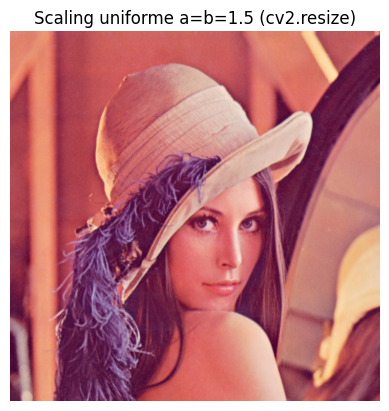

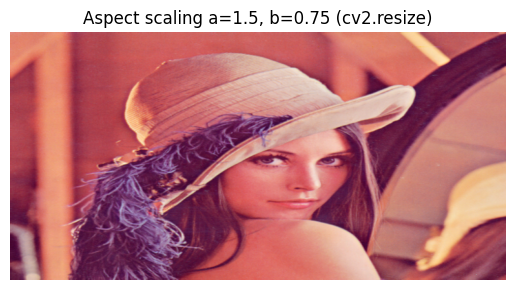

In [2]:
# Escalamiento uniforme (a=b=1.5)
scaled_uniform = cv2.resize(img_rgb, dsize=None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

plt.imshow(scaled_uniform)
plt.title("Scaling uniforme a=b=1.5 (cv2.resize)")
plt.axis("off")
plt.show()

# Escalamiento anisotrópico (a=1.5 en x, b=0.75 en y)
scaled_aspect = cv2.resize(img_rgb, dsize=None, fx=1.5, fy=0.75, interpolation=cv2.INTER_LINEAR)

plt.imshow(scaled_aspect)
plt.title("Aspect scaling a=1.5, b=0.75 (cv2.resize)")
plt.axis("off")
plt.show()


### B) Escalamiento centrado con `cv2.warpAffine`

Para escalar alrededor del **centro** $((c_x,c_y))$ con factores \(a\) y \(b\), usamos:
$
\mathbf{M} =
\begin{bmatrix}
a & 0 & t_x\\
0 & b & t_y
\end{bmatrix},\quad
t_x = c_x - a\,c_x,\quad
t_y = c_y - b\,c_y.
$

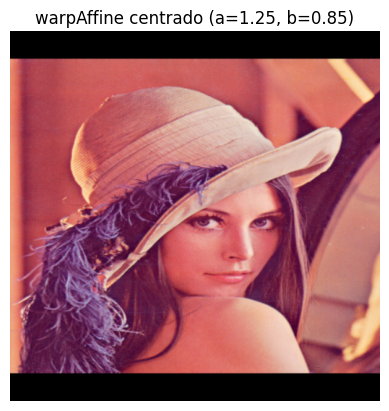

In [3]:
h, w = img_rgb.shape[:2]
cx, cy = (w - 1) / 2.0, (h - 1) / 2.0

a, b = 1.25, 0.85  # factores de escala
tx = cx - a * cx
ty = cy - b * cy

M = np.float32([[a, 0, tx],
                [0, b, ty]])

scaled_center = cv2.warpAffine(img_rgb, M, (w, h), flags=cv2.INTER_LINEAR)

plt.imshow(scaled_center)
plt.title(f"warpAffine centrado (a={a}, b={b})")
plt.axis("off")
plt.show()


## Aplicaciones en robótica

- **Normalización de entradas** para redes neuronales o detectores clásicos (llevar todas las imágenes a un tamaño esperado).  
- **Simulación de cambios de zoom/distancia** para evaluar robustez del pipeline de visión.  
- **Registro/mosaicos**: alinear imágenes de diferentes escalas para mapeo visual.  
- **Ajuste de relación de aspecto** cuando los módulos posteriores (CNN, SLAM) requieren dimensiones específicas.  
